In [103]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [104]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [105]:
#load the dataset into a dataframe using pd.read_csv().
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
#print the first 5 entries in the dataframe, just to see if the data set is loaded properly or not.
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [106]:
bank_df.shape

(5000, 14)

In [107]:
bank_df.info()
#there are no categorical features in this data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [108]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [109]:
###There are some data point which has negative years of experience, this looks like erroneous data as experience can't be negative.
###Replacing negative experience with 0.
bank_df["Experience"][bank_df["Experience"] < 0] = 0

## Study the data distribution in each attribute, share your findings. (10 points)

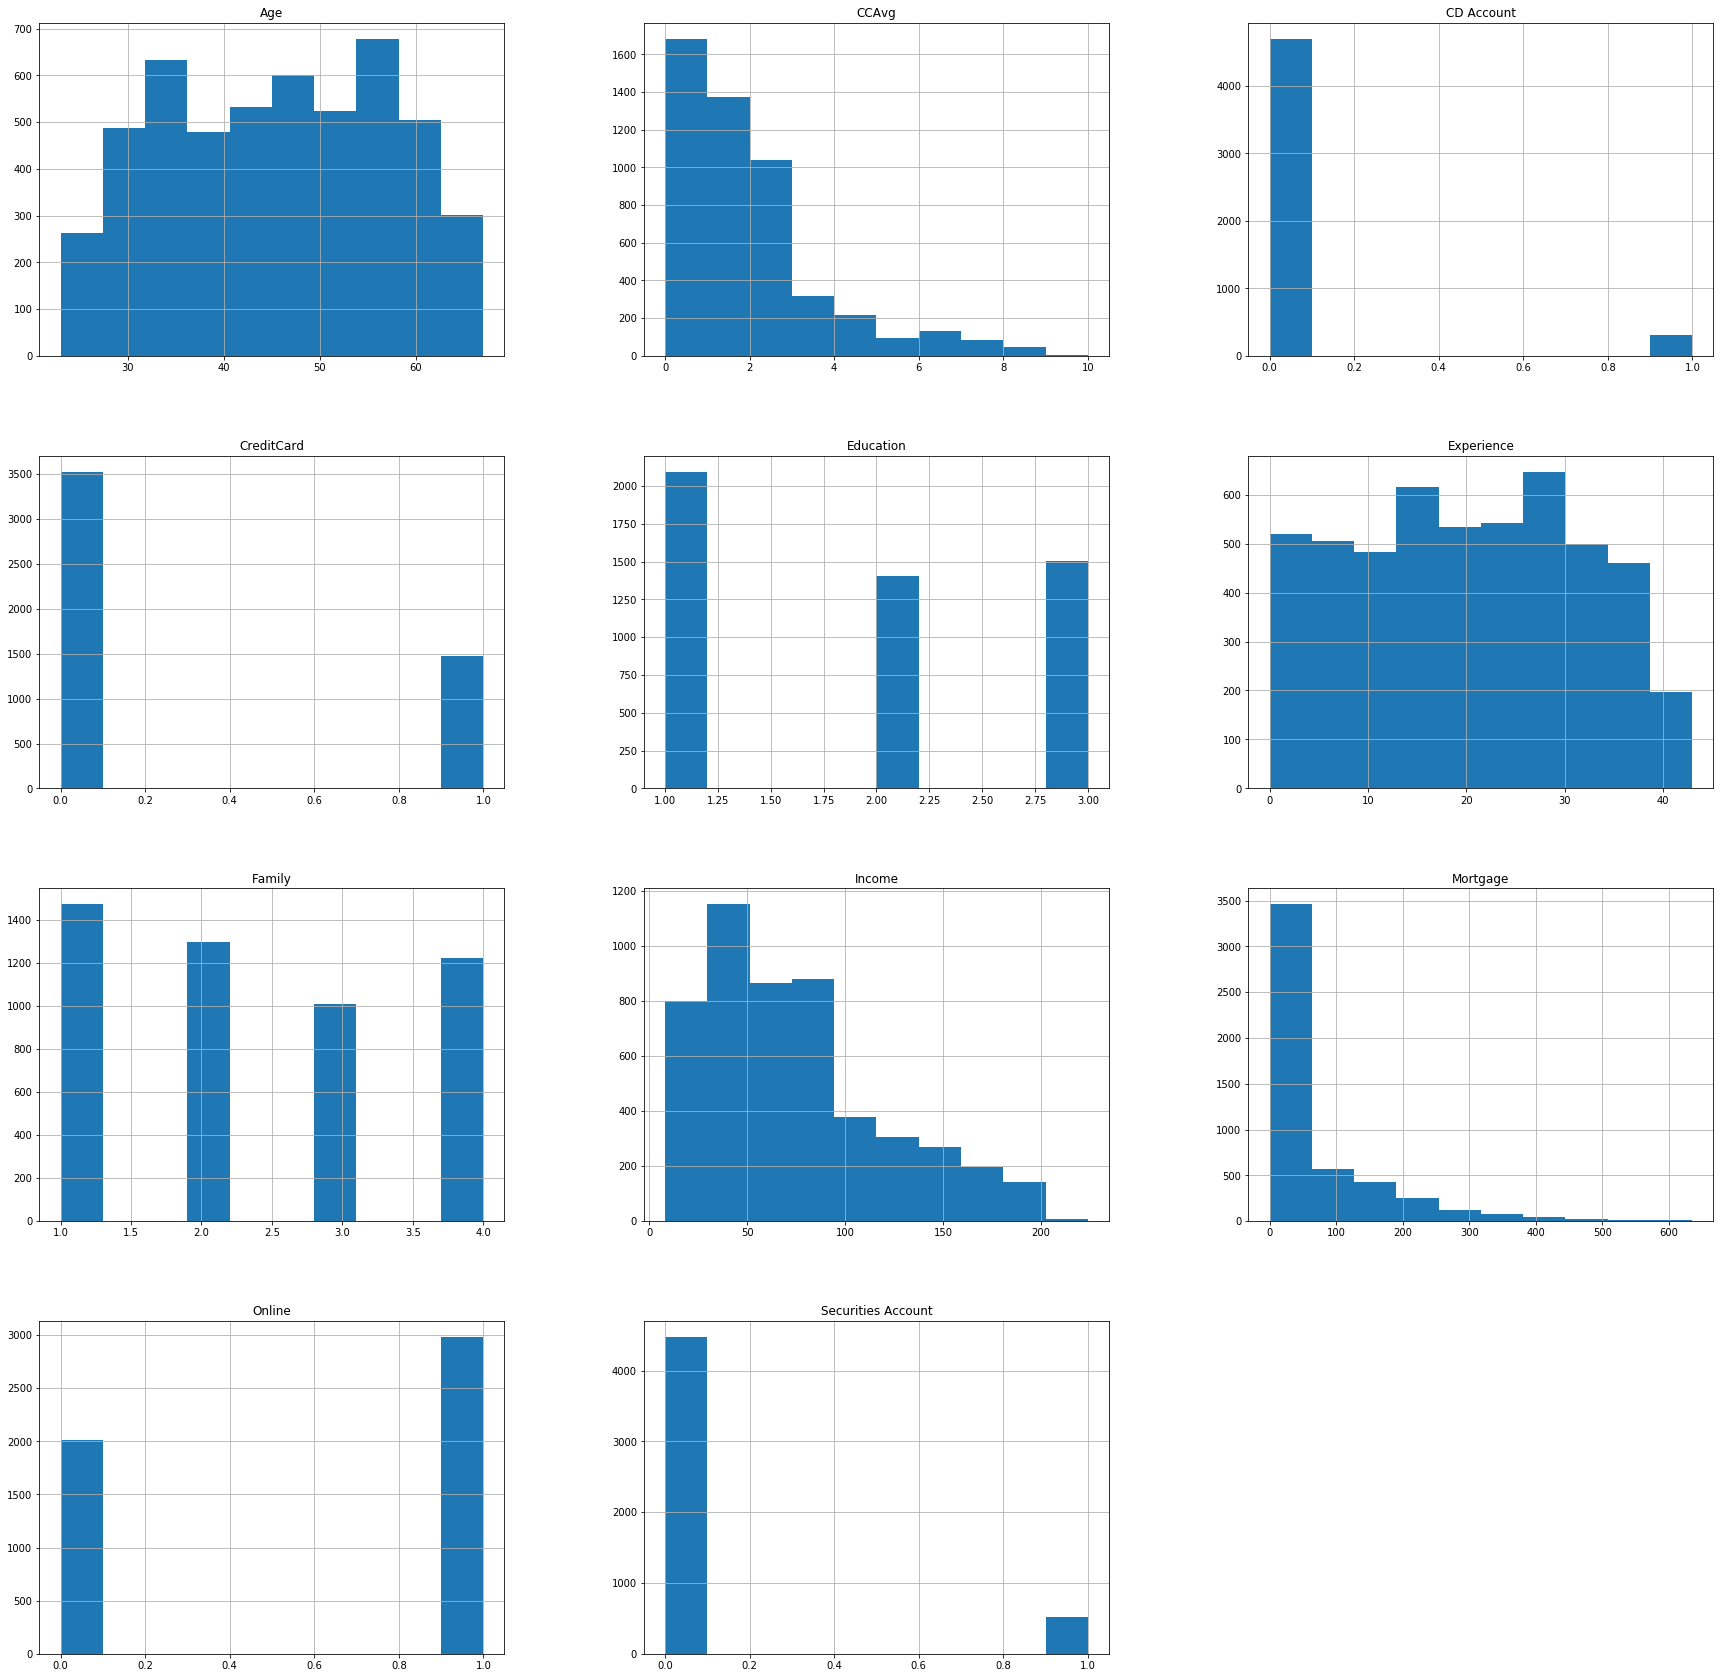

In [110]:
plot = bank_df.hist(column=["Age","Experience","Income", "Family", "CCAvg", "Education", "Mortgage", "Securities Account", "CD Account", "Online", "CreditCard"],figsize=[30,30])

In [111]:
###Findings about the distribution of each attribute
###Age : Data is spread from 23years to 67 years. Majority of account holders are between 52-57 years of Age. Mean and median age of account holders is 45.
###CCAvg:Data is spread from 0$ spend to 10$ spend. 
###Data is right skewed. Majority of account holders spend between 0$ to 1$.
###CD Account: Majority of account holders doesn't have Certificate of Deposit account with the bank.
###Education: Majority of account holders are undergradutes. Account holders having graduate and Advanced education are similar in number in the given data set.
###Experience: Majority of account holders are having experience in the range of 20 to 30 years.
###Family: Majority of the account holders family size is and with family size of 2 and 4 are similar in number.
###Income: This column is right skewed and majority of the customers earn in the range of 25-50$.
###Mortgage: This column is right skewed and majority of the customers has mortgage in the range of 0-70$.
###Online: Majority of the customers using online facility.
###Securities Account: Very few customers have securities account with the bank.
###ZIP Code: All the customers live in the region with zipcode between 93000 to 96000.

## Get the target column distribution. 

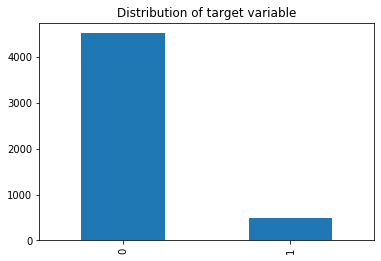

In [112]:
#distribution for target variable
pd.value_counts(bank_df['Personal Loan']).plot(kind="bar", title="Distribution of target variable")

## Split the data into training and test set in the ratio of 70:30 respectively

In [113]:
#dropping ID and Zipcode columns as they are not useful for predicting target variable
#bank_df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)
bank_df.drop(['ID'], axis=1, inplace=True)
bank_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [114]:
#assigning all the columns except 'Personal Loan'(target column) to X
X = bank_df.drop('Personal Loan', axis=1)
X.head()

#assigning target feature 'Personal Loan' to y
y = bank_df['Personal Loan']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [115]:
#split the data into train and test data sets in 70:30 ratio. 
train_size = 0.70
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=seed)

## Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)

In [116]:
#Performing feature scaling as each attributes has different scales.
sc=StandardScaler()
sc.fit(X_train)
scaled_xtrain = sc.transform(X_train)
scaled_xtest = sc.transform(X_test)

In [117]:
###K-NN model
### Finding best K and lowest MSE using cross_val_score
neighbors = range(1,20,2)
cv_score = []
MSE = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_xtrain,y_train)
    score = cross_val_score(knn, scaled_xtrain, y_train, cv=10, scoring="accuracy")
    cv_score.append(score.mean())
    
MSE = [1 - x for x in cv_score]
best_k = neighbors[MSE.index(min(MSE))]
knn = KNeighborsClassifier(best_k)
knn.fit(scaled_xtrain,y_train)
#predict
knn_y_pred_class = knn.predict(scaled_xtest)
# calculate accuracy
print(metrics.accuracy_score(y_test, knn_y_pred_class))

0.9626666666666667


In [118]:
#Naive Bayes model
nb = GaussianNB()
nb.fit(scaled_xtrain,y_train)
#Predict
nb_y_pred_class = nb.predict(scaled_xtest)
# calculate precision
metrics.precision_score(y_test,nb_y_pred_class,average='weighted')

0.904640826873385

In [119]:
#Logistic regression
lr = LogisticRegression()
lr.fit(scaled_xtrain,y_train)
#predict
lr_y_pred_class = lr.predict(scaled_xtest)
# calculate accuracy
print(metrics.accuracy_score(y_test, lr_y_pred_class))

0.9526666666666667


## Print the confusion matrix for all the above models (10 points)

In [120]:
###K-NN confusion matrix
metrics.confusion_matrix(y_test, knn_y_pred_class)

array([[1351,    9],
       [  47,   93]], dtype=int64)

In [121]:
###Naive Bayes confusion matrix
metrics.confusion_matrix(y_test, nb_y_pred_class)

array([[1234,  126],
       [  56,   84]], dtype=int64)

In [122]:
###Logistic regression confusion matrix
metrics.confusion_matrix(y_test, lr_y_pred_class)

array([[1339,   21],
       [  50,   90]], dtype=int64)

## Give your reasoning on which is the best model in this case and why it performs better? (10 points) 

In [123]:
print(metrics.classification_report(y_test, knn_y_pred_class))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1360
           1       0.91      0.66      0.77       140

    accuracy                           0.96      1500
   macro avg       0.94      0.83      0.87      1500
weighted avg       0.96      0.96      0.96      1500



In [124]:
print(metrics.classification_report(y_test, nb_y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1360
           1       0.40      0.60      0.48       140

    accuracy                           0.88      1500
   macro avg       0.68      0.75      0.71      1500
weighted avg       0.90      0.88      0.89      1500



In [125]:
print(metrics.classification_report(y_test, lr_y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1360
           1       0.81      0.64      0.72       140

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



Conclusion:

Looking at the recall, F1 and precision scores, KNN worked better for this given data set. 

As bank would like to get most of the customers who will take personal loans, recall might be the most important parameter to be considered. 

Since each column in the data has high variances, KNN has worked better.